## Task1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –¥–ª—è –∫—Ä–∞—Å–∏–≤—ã—Ö –≥—Ä–∞—Ñ–∏–∫–æ–≤
sns.set(style="whitegrid")

In [ ]:
url = "https://drive.google.com/uc?id=1vv2jGNp6EO8HHRoscDRQU90faR3j8iTN"
df = pd.read_csv(url)
features = ['MPG.city', 'MPG.highway', 'Horsepower', 'Price']
df = df[features].dropna()
df.head()

MPG.city  MPG.highway  Horsepower  Price
0        25           31         140   15.9
1        18           25         200   33.9
2        20           26         172   29.1
3        19           26         172   37.7
4        22           30         208   30.0

##–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –∏ –¥–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ—è–Ω–∏—è

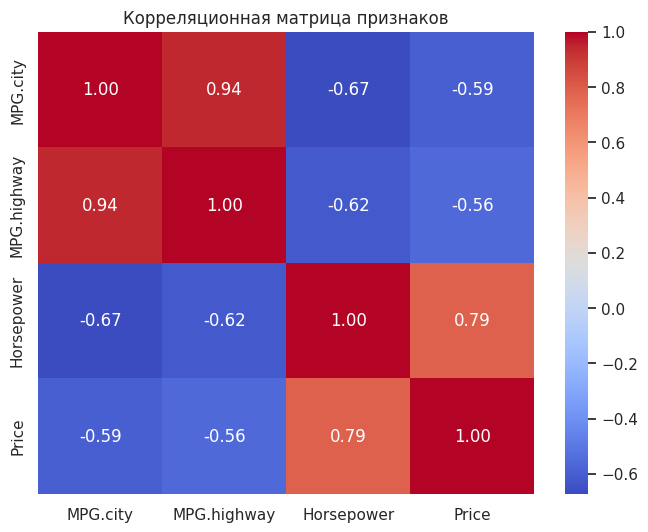

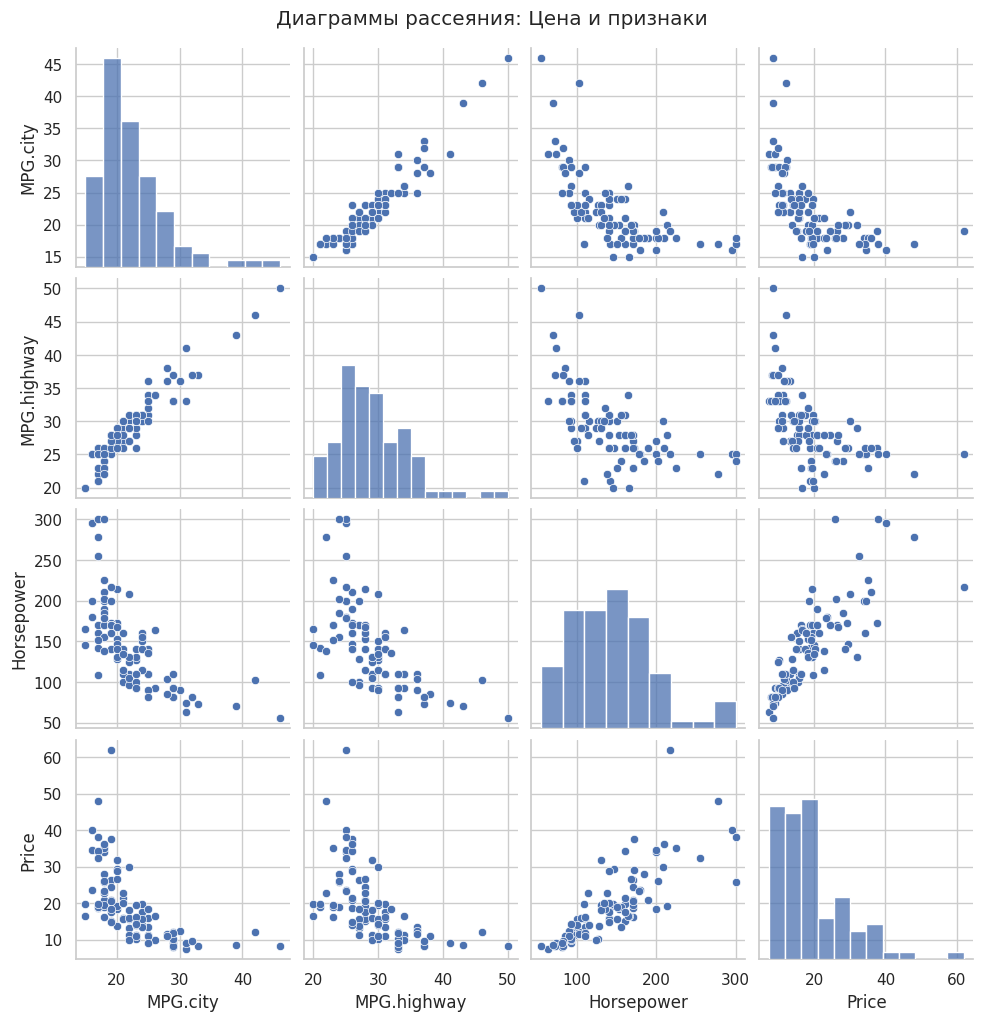

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.show()

# –î–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ—è–Ω–∏—è
sns.pairplot(df)
plt.suptitle('–î–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ—è–Ω–∏—è: –¶–µ–Ω–∞ –∏ –ø—Ä–∏–∑–Ω–∞–∫–∏', y=1.02)
plt.show()

**–ü–æ—è—Å–Ω–µ–Ω–∏–µ:** –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –ª–∏–Ω–µ–π–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏. –î–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ–∑–≤–æ–ª—è—é—Ç –≤–∏–∑—É–∞–ª—å–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å —Ö–∞—Ä–∞–∫—Ç–µ—Ä –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏.

## –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –æ—Ü–µ–Ω–∫–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –º–æ–¥–µ–ª–∏ (–ú–ù–ö)

In [ ]:
X = df[['MPG.city', 'MPG.highway', 'Horsepower']].values
y = df['Price'].values.reshape(-1, 1)

# –î–æ–±–∞–≤–ª—è–µ–º —Å—Ç–æ–ª–±–µ—Ü –µ–¥–∏–Ω–∏—Ü –¥–ª—è —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ —á–ª–µ–Ω–∞ (–∏–Ω—Ç–µ—Ä—Å–µ–ø—Ç)
X_b = np.hstack([np.ones((X.shape[0], 1)), X])

# –§–æ—Ä–º—É–ª–∞ –ú–ù–ö: (X^T X)^-1 X^T y
beta_hat = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# –í—ã–≤–æ–¥–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤
columns = ['Intercept', 'MPG.city', 'MPG.highway', 'Horsepower']
for name, value in zip(columns, beta_hat.flatten()):
    print(f"{name}: {value:.4f}")

Intercept: 6.6887
MPG.city: -0.0386
MPG.highway: -0.1789
Horsepower: 0.1313


## –û—Å—Ç–∞—Ç–∫–∏ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—è –æ—à–∏–±–æ–∫

In [ ]:
y_hat = X_b @ beta_hat
residuals = y - y_hat
n, p = X_b.shape
sigma2 = (residuals.T @ residuals) / (n - p)
print(f"–û—Ü–µ–Ω–∫–∞ –æ—Å—Ç–∞—Ç–æ—á–Ω–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏: {sigma2.item():.4f}")

–û—Ü–µ–Ω–∫–∞ –æ—Å—Ç–∞—Ç–æ—á–Ω–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏: 35.6947


## –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤

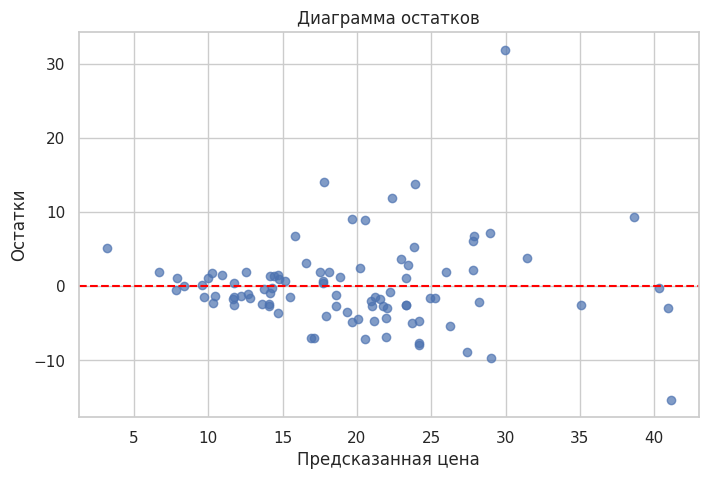

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_hat, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è —Ü–µ–Ω–∞')
plt.ylabel('–û—Å—Ç–∞—Ç–∫–∏')
plt.title('–î–∏–∞–≥—Ä–∞–º–º–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤')
plt.show()

## –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –æ—à–∏–±–∫–∏ –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –¥–ª—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤

In [ ]:
var_beta = sigma2.item() * np.linalg.inv(X_b.T @ X_b)
se_beta = np.sqrt(np.diag(var_beta))
t_crit = stats.t.ppf(0.975, df=n - p)

for name, b, se in zip(columns, beta_hat.flatten(), se_beta):
    lower = b - t_crit * se
    upper = b + t_crit * se
    print(f"{name}: ({lower:.4f}, {upper:.4f})")

Intercept: (-5.2102, 18.5876)
MPG.city: (-0.7481, 0.6709)
MPG.highway: (-0.8835, 0.5258)
Horsepower: (0.0993, 0.1633)


## –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ R¬≤



In [ ]:
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_res = np.sum(residuals ** 2)
r2 = 1 - ss_res / ss_total
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ R¬≤: {r2:.4f}")

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ R¬≤: 0.6299


## –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∏—Å—Ç–∏–Ω–Ω—ã—Ö –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π

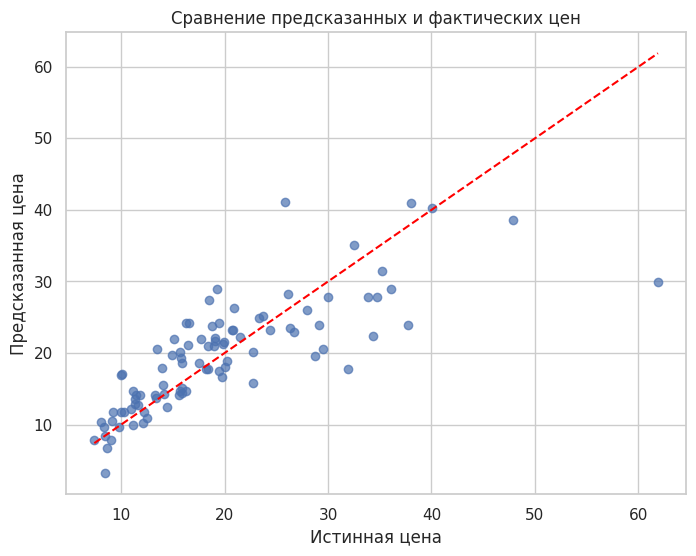

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_hat, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('–ò—Å—Ç–∏–Ω–Ω–∞—è —Ü–µ–Ω–∞')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è —Ü–µ–Ω–∞')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∏ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö —Ü–µ–Ω')
plt.show()

## –ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑

### –ì–∏–ø–æ—Ç–µ–∑–∞ 1: –ú–æ—â–Ω–æ—Å—Ç—å –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–Ω—É (Horsepower > 0)

In [ ]:
t_stat_hp = beta_hat[3] / se_beta[3]
p_value_hp = 1 - stats.t.cdf(t_stat_hp, df=n - p)
print(f"–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ t = {t_stat_hp.item():.4f}, p-value = {p_value_hp.item():.4f}")

NameError: name 'beta_hat' is not defined

### –ì–∏–ø–æ—Ç–µ–∑–∞ 2: –¶–µ–Ω–∞ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ä–∞—Å—Ö–æ–¥–∞ –≤ –≥–æ—Ä–æ–¥–µ (MPG.city ‚â† 0)

In [ ]:
t_stat_city = beta_hat[1] / se_beta[1]
p_value_city = 2 * (1 - stats.t.cdf(np.abs(t_stat_city), df=n - p))
print(f"–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ t = {t_stat_city.item():.4f}, p-value = {p_value_city.item():.4f}")

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ t = -0.1081, p-value = 0.9142


### –ì–∏–ø–æ—Ç–µ–∑–∞ 3: –í–ª–∏—è–Ω–∏–µ MPG.city –∏ MPG.highway –æ–¥–∏–Ω–∞–∫–æ–≤–æ

In [ ]:
diff = beta_hat[1] - beta_hat[2]
se_diff = np.sqrt(var_beta[1,1] + var_beta[2,2] - 2*var_beta[1,2])
t_stat_diff = diff / se_diff
p_value_diff = 2 * (1 - stats.t.cdf(np.abs(t_stat_diff), df=n - p))
print(f"–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ t = {t_stat_diff.item():.4f}, p-value = {p_value_diff.item():.4f}")

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ t = 0.2018, p-value = 0.8406


## –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑

### –ì–∏–ø–æ—Ç–µ–∑–∞ 1: –ú–æ—â–Ω–æ—Å—Ç—å –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–Ω—É –∞–≤—Ç–æ–º–æ–±–∏–ª—è

**–§–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∞ –≥–∏–ø–æ—Ç–µ–∑:**
- H‚ÇÄ: Œ≤<sub>horsepower</sub> = 0 ‚Äî –º–æ—â–Ω–æ—Å—Ç—å –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–Ω—É
- H‚ÇÅ: Œ≤<sub>horsepower</sub> > 0 ‚Äî –º–æ—â–Ω–æ—Å—Ç—å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–Ω—É

**–†–µ–∑—É–ª—å—Ç–∞—Ç—ã:**
- t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 8.1530  
- p-value: 0.0000  

**–í—ã–≤–æ–¥:**  
–¢–∞–∫ –∫–∞–∫ p-value < 0.05, –º—ã –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É.  
**–ú–æ—â–Ω–æ—Å—Ç—å –¥–≤–∏–≥–∞—Ç–µ–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–Ω—É –∞–≤—Ç–æ–º–æ–±–∏–ª—è: –±–æ–ª–µ–µ –º–æ—â–Ω—ã–µ –∞–≤—Ç–æ–º–æ–±–∏–ª–∏, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, –¥–æ—Ä–æ–∂–µ.**

---

### –ì–∏–ø–æ—Ç–µ–∑–∞ 2: –†–∞—Å—Ö–æ–¥ –≤ –≥–æ—Ä–æ–¥–µ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–Ω—É

**–§–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∞ –≥–∏–ø–æ—Ç–µ–∑:**
- H‚ÇÄ: Œ≤<sub>city</sub> = 0 ‚Äî —Ä–∞—Å—Ö–æ–¥ –≤ –≥–æ—Ä–æ–¥–µ –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–Ω—É

**–†–µ–∑—É–ª—å—Ç–∞—Ç—ã:**
- t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: ‚Äì0.1081  
- p-value: 0.9142  

**–í—ã–≤–æ–¥:**  
–¢–∞–∫ –∫–∞–∫ p-value –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª—å—à–µ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 0.05, –Ω–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–∞—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É.  
**–†–∞—Å—Ö–æ–¥ –≤ –≥–æ—Ä–æ–¥–µ –Ω–µ –æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–≥–æ –≤–ª–∏—è–Ω–∏—è –Ω–∞ —Ü–µ–Ω—É –∞–≤—Ç–æ–º–æ–±–∏–ª—è.**

---

### –ì–∏–ø–æ—Ç–µ–∑–∞ 3: –†–∞—Å—Ö–æ–¥ –≤ –≥–æ—Ä–æ–¥–µ –∏ –Ω–∞ —à–æ—Å—Å–µ –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–Ω—É –æ–¥–∏–Ω–∞–∫–æ–≤–æ

**–§–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∞ –≥–∏–ø–æ—Ç–µ–∑:**
- H‚ÇÄ: Œ≤<sub>city</sub> = Œ≤<sub>highway</sub> ‚Äî –≤–ª–∏—è–Ω–∏–µ –≥–æ—Ä–æ–¥—Å–∫–æ–≥–æ –∏ —à–æ—Å—Å–µ–π–Ω–æ–≥–æ —Ä–∞—Å—Ö–æ–¥–∞ –Ω–∞ —Ü–µ–Ω—É –æ–¥–∏–Ω–∞–∫–æ–≤–æ

**–†–µ–∑—É–ª—å—Ç–∞—Ç—ã:**
- t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 0.2018  
- p-value: 0.8406  

**–í—ã–≤–æ–¥:**  
p-value –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–µ–≤—ã—à–∞–µ—Ç —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 0.05.  
**–ù–µ—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω—ã—Ö –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤ —Ç–æ–≥–æ, —á—Ç–æ –≤–ª–∏—è–Ω–∏–µ —Ä–∞—Å—Ö–æ–¥–∞ –≤ –≥–æ—Ä–æ–¥–µ –∏ –Ω–∞ —à–æ—Å—Å–µ –Ω–∞ —Ü–µ–Ω—É —Ä–∞–∑–ª–∏—á–∞–µ—Ç—Å—è. –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –≥–∏–ø–æ—Ç–µ–∑–∞ –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è.**

## Task2


In [ ]:
# –ò–º–ø–æ—Ä—Ç—ã
import pandas as pd
import numpy as np
from scipy.stats import f

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
url = "https://drive.google.com/uc?id=1gzPRqj7gZetjsipo3xpogYGL76enZDNO "
data = pd.read_csv(url)

# –ü—Ä–æ—Å–º–æ—Ç—Ä –ø–µ—Ä–≤—ã—Ö —Å—Ç—Ä–æ–∫
data.head()

sex     bmi smoker
0  female  27.900    yes
1    male  33.770     no
2    male  33.000     no
3    male  22.705     no
4    male  28.880     no

- **`bmi_yes`** ‚Äî –≤—ã–±–æ—Ä–∫–∞ BMI —É –∫—É—Ä—è—â–∏—Ö  
- **`bmi_no`**  ‚Äî –≤—ã–±–æ—Ä–∫–∞ BMI —É –Ω–µ–∫—É—Ä—è—â–∏—Ö  
- **`n_yes`**, **`n_no`** ‚Äî —Ä–∞–∑–º–µ—Ä—ã –≤—ã–±–æ—Ä–æ–∫  
- **`xÃÑ_yes`**, **`xÃÑ_no`**, **`xÃÑ_total`** ‚Äî —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è:
  - `xÃÑ_yes` ‚Äî —Å—Ä–µ–¥–Ω–µ–µ BMI –∫—É—Ä—è—â–∏—Ö,  
  - `xÃÑ_no` ‚Äî —Å—Ä–µ–¥–Ω–µ–µ BMI –Ω–µ–∫—É—Ä—è—â–∏—Ö,  
  - `xÃÑ_total` ‚Äî –æ–±—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ BMI.  

In [ ]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –≥—Ä—É–ø–ø—ã
bmi_yes = data[data['smoker'] == 'yes']['bmi']
bmi_no = data[data['smoker'] == 'no']['bmi']

# –†–∞–∑–º–µ—Ä—ã –≤—ã–±–æ—Ä–æ–∫
n_yes, n_no = len(bmi_yes), len(bmi_no)
total_n = n_yes + n_no

# –°—Ä–µ–¥–Ω–∏–µ
mean_yes, mean_no = bmi_yes.mean(), bmi_no.mean()
total_mean = data['bmi'].mean()

print(f"–°—Ä–µ–¥–Ω–µ–µ BMI —É –∫—É—Ä—è—â–∏—Ö: {mean_yes:.3f}")
print(f"–°—Ä–µ–¥–Ω–µ–µ BMI —É –Ω–µ–∫—É—Ä—è—â–∏—Ö: {mean_no:.3f}")
print(f"–û–±—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ: {total_mean:.3f}")

–°—Ä–µ–¥–Ω–µ–µ BMI —É –∫—É—Ä—è—â–∏—Ö: 30.708
–°—Ä–µ–¥–Ω–µ–µ BMI —É –Ω–µ–∫—É—Ä—è—â–∏—Ö: 30.652
–û–±—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ: 30.663


### üßÆ –§–æ—Ä–º—É–ª—ã:

1. **–û–±—â–∞—è —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ (SST):**  
   $$
   SST = \sum_{i} (x_i - \bar{x}_{total})^2
   $$  

2. **–ú–µ–∂–≥—Ä—É–ø–ø–æ–≤–∞—è —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ (SSB):**  
   $$
   SSB = \sum_{j} n_j (\bar{x}_j - \bar{x}_{total})^2
   $$  
   –≥–¥–µ:  
   - $j$ ‚Äî –∏–Ω–¥–µ–∫—Å –≥—Ä—É–ø–ø—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, `yes`/`no`),  
   - $n_j$ ‚Äî —Ä–∞–∑–º–µ—Ä –≥—Ä—É–ø–ø—ã $j$.  

3. **–í–Ω—É—Ç—Ä–∏–≥—Ä—É–ø–ø–æ–≤–∞—è —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ (SSW):**  
   $$
   SSW = \sum_{j} \sum_{i} (x_{ij} - \bar{x}_j)^2
   $$  
   –≥–¥–µ:  
   - $x_{ij}$ ‚Äî $i$-–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ –≤ –≥—Ä—É–ø–ø–µ j,  
   - $\bar{x}_j\$ ‚Äî —Å—Ä–µ–¥–Ω–µ–µ –≥—Ä—É–ø–ø—ã j.  


In [ ]:
# –ú–µ–∂–≥—Ä—É–ø–ø–æ–≤–∞—è —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ (SSB)
ssb = n_yes * (mean_yes - total_mean)**2 + n_no * (mean_no - total_mean)**2

# –í–Ω—É—Ç—Ä–∏–≥—Ä—É–ø–ø–æ–≤–∞—è —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ (SSW)
ssw_yes = ((bmi_yes - mean_yes)**2).sum()
ssw_no = ((bmi_no - mean_no)**2).sum()
ssw = ssw_yes + ssw_no

# –û–±—â–∞—è —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ (SST)
sst = ssb + ssw

# –°—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã
df_between = 2 - 1  # k - 1
df_within = total_n - 2  # N - k
df_total = total_n - 1

# –î–∏—Å–ø–µ—Ä—Å–∏–∏ (MSB –∏ MSW)
msb = ssb / df_between
msw = ssw / df_within

# F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
f_stat = msb / msw

# p-value
p_value = 1 - f.cdf(f_stat, df_between, df_within)

print(f"\nSSB: {ssb:.3f}, SSW: {ssw:.3f}, SST: {sst:.3f}")
print(f"MSB: {msb:.3f}, MSW: {msw:.3f}")
print(f"F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {f_stat:.3f}")
print(f"p-value: {p_value:.5f}")


SSB: 0.699, SSW: 49719.501, SST: 49720.200
MSB: 0.699, MSW: 37.215
F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 0.019
p-value: 0.89099


In [ ]:
anova_table = pd.DataFrame({
    'Source': ['Between Groups', 'Within Groups', 'Total'],
    'Sum of Squares': [ssb, ssw, sst],
    'Degrees of Freedom': [df_between, df_within, df_total],
    'Mean Square': [msb, msw, np.nan],
    'F': [f_stat, np.nan, np.nan],
    'p-value': [p_value, np.nan, np.nan]
})
print("\n–¢–∞–±–ª–∏—Ü–∞ ANOVA:")
display(anova_table)


–¢–∞–±–ª–∏—Ü–∞ ANOVA:


Source  Sum of Squares  Degrees of Freedom  Mean Square         F  \
0  Between Groups        0.699349                   1     0.699349  0.018792   
1   Within Groups    49719.501037                1336    37.215195       NaN   
2           Total    49720.200386                1337          NaN       NaN   

    p-value  
0  0.890985  
1       NaN  
2       NaN

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("‚úÖ –ì–∏–ø–æ—Ç–µ–∑–∞ H‚ÇÄ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è: —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è BMI —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è.")
else:
    print("‚ùå –ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–∞—Ç—å H‚ÇÄ: —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è BMI –Ω–µ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è.")

‚ùå –ù–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–∞—Ç—å H‚ÇÄ: —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è BMI –Ω–µ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è.
